In [139]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

nondef1, nondef2, nondef3, nondef4, nondef5 = sy.symbols('nondef1, nondef2, nondef3, nondef4, nondef5')      

In [140]:
# Präfixe
_nano = 10 ** (-9)
_mikro = 10 ** (-6)
_milli = 10 ** (-3)
_centi = 10 ** (-2)
_dezi = 10 ** (-1)

_Kilo = 10 ** 3
_Mega = 10 ** 6
_Giga = 10 ** 9
_Tera = 10 ** 12

# Winkel
_degree = 2*np.pi/360

In [141]:
# feste Parameter und ihre Zahlenwerte: diese werden später in der Fehlerfunktion numerisch gemacht aber bleiben für die partiellen Ableitungen symbolisch
g, pi, mu_0, G = sy.symbols('g, pi, mu_0, G')            
                                                
fix_parameters = {
    G: 6.672 * 10 ** (-11),
    g: 9.81, 
    pi: 3.141,
    mu_0: 4 * np.pi * 10 **(-7),
}   

In [142]:
# verwendbare, symbolische Variablen, Zusätzliche einfach hinzufügen
t, U0_sy, U90_sy, U0_ref_sy, U90_ref_sy = sy.symbols('t, U0_sy, U90_sy, U0_ref_sy, U90_ref_sy')                     

In [143]:
def err_gauss(f, var1, x1, err1, var2=nondef1, x2=0, err2=0, var3=nondef2, x3=0, err3=0, var4=nondef3, x4=0, err4=0, var5=nondef4, x5=0, err5=0):
    f_x1 = sy.diff(f, var1)
    # print(f'Ableitung nach {var1}: {f_x1}')   
    f_x1 = f_x1.subs({var2: x2, var3: x3, var4: x4, var5: x5})
    f_x2 = sy.diff(f, var2)
    # if f_x2 != 0:
        # print(f'Ableitung nach {var2}: {f_x2}')   
    f_x2 = f_x2.subs({var1: x1, var3: x3, var4: x4, var5: x5})
    f_x3 = sy.diff(f, var3)
    # if f_x3 != 0:
        # print(f'Ableitung nach {var3}: {f_x3}')   
    f_x3 = f_x3.subs({var1: x1, var2: x2, var4: x4, var5: x5})
    f_x4 = sy.diff(f, var4)
    # if f_x4 != 0:
        # print(f'Ableitung nach {var4}: {f_x4}')   
    f_x4 = f_x4.subs({var1: x1, var2: x2, var3: x3, var5: x5})
    f_x5 = sy.diff(f, var5)
    # if f_x5 != 0:
        # print(f'Ableitung nach {var5}: {f_x5}')   
    f_x5 = f_x5.subs({var1: x1, var2: x2, var3: x3, var4: x4})

    # feste paramter numerisch machen
    f = f.subs(fix_parameters)
    f_x1 = f_x1.subs(fix_parameters)
    f_x2 = f_x2.subs(fix_parameters)
    f_x3 = f_x3.subs(fix_parameters)
    f_x4 = f_x4.subs(fix_parameters)
    f_x5 = f_x5.subs(fix_parameters)

    value = f.subs({var1: x1, var2: x2, var3: x3, var4: x4, var5: x5})
    error = (err1**2*(f_x1.subs(var1, x1))**2+err2**2*(f_x2.subs(var2, x2))**2+err3**2*(f_x3.subs(var3, x3))**2+err4**2*(f_x4.subs(var4, x4))**2+err5**2*(f_x5.subs(var5, x5))**2)**0.5
    # print(f'Wert: {value} +/- Fehler: {error}')
    return (value, error)

In [144]:
def gew_mittel(ar_val, ar_err):
    value_num = 0
    sigma_denom = 0
    for i in range(len(ar_val)):
        value_num += ar_val[i]/ar_err[i]**2
        sigma_denom += 1/ar_err[i]**2
    value = value_num/sigma_denom
    sigma = (1/sigma_denom)**0.5
    print(f'gew. Mittelwert: {value} +/- sigma: {sigma}')
    return (value, sigma)

In [145]:
# Import der Messwerte
a_spalt_dataframe = np.loadtxt('24_data/a_spalt_12000', skiprows = 0, delimiter = '\t')
b_steg_dataframe = np.loadtxt('24_data/b_steg_12000', skiprows = 0 + 1, delimiter = '\t')
c_kreisblende_dataframe = np.loadtxt('24_data/c_kreisblende_140_50', skiprows = 0, delimiter = '\t')
d_doppellochblende_dataframe = np.loadtxt('24_data/d_doppellochblende_100_50', skiprows = 0, delimiter = '\t')
e_gitter_dataframe = np.loadtxt('24_data/e_gitter_240_50', skiprows = 0, delimiter = '\t')


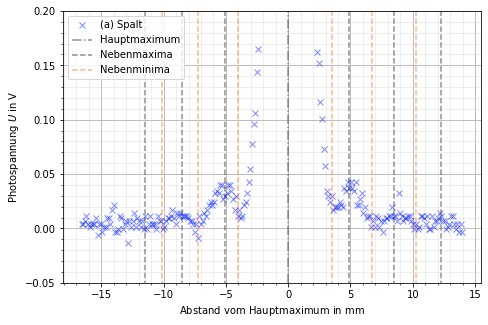

In [146]:
# (a) Spalt

# Hauptmaximum
max_spalt = 13050

# Nebenmaxima
smax_l3_spalt = -11.5
smax_l2_spalt = -8.5
smax_l1_spalt = -5.1

smax_r1_spalt = 4.9
smax_r2_spalt = 8.5
smax_r3_spalt = 12.25

# Nebenminima
smin_l3_spalt = -10.1
smin_l2_spalt = -7.25
smin_l1_spalt = -4

smin_r1_spalt = 3.55
smin_r2_spalt = 6.75
smin_r3_spalt = 10.25


# Datenarrays
motorposition_spalt = (a_spalt_dataframe[:,0] - max_spalt) / 400
photospannung_spalt = a_spalt_dataframe[:,1]

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(motorposition_spalt, photospannung_spalt, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(a) Spalt')

# Hauptmaximum
plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
plt.vlines(x = [smax_l3_spalt, smax_l2_spalt, smax_l1_spalt, smax_r1_spalt, smax_r2_spalt, smax_r3_spalt], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_spalt, smin_l2_spalt, smin_l1_spalt, smin_r1_spalt, smin_r2_spalt, smin_r3_spalt], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0.05, 0.2])

plt.savefig('./V24_BI_a_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

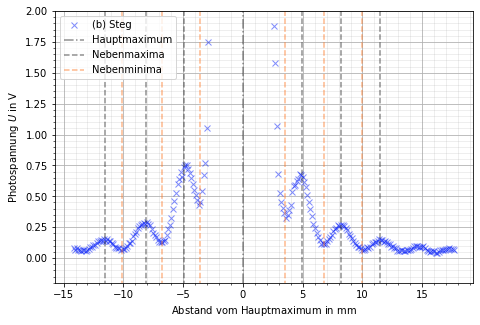

In [147]:
# (b) Steg

# Hauptmaximum
max_steg = 19900

# Nebenmaxima
smax_l3_steg = -11.5
smax_l2_steg = -8.1
smax_l1_steg = -4.9

smax_r1_steg = 4.9
smax_r2_steg = 8.2
smax_r3_steg = 11.5

# Nebenminima
smin_l3_steg = -10.1
smin_l2_steg = -6.8
smin_l1_steg = -3.6

smin_r1_steg = 3.55
smin_r2_steg = 6.75
smin_r3_steg = 10


# Datenarrays
motorposition_steg = (b_steg_dataframe[:,0] - max_steg) / 400
photospannung_steg = b_steg_dataframe[:,1]

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(motorposition_steg, photospannung_steg, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(b) Steg')

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')   # Hauptmaximum
plt.vlines(x = [smax_l3_steg, smax_l2_steg, smax_l1_steg, smax_r1_steg, smax_r2_steg, smax_r3_steg], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_steg, smin_l2_steg, smin_l1_steg, smin_r1_steg, smin_r2_steg, smin_r3_steg], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0.2, 2])

plt.savefig('./V24_BI_c_kreisblende.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

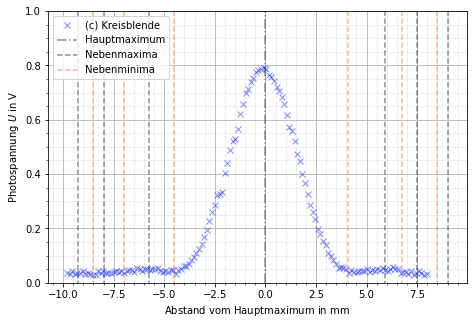

In [148]:
# (c) Kreisblende

# Hauptmaximum
max_kreisblende = 20000

# Nebenmaxima
smax_l3_kreisblende = -9.25
smax_l2_kreisblende = -8
smax_l1_kreisblende = -5.75

smax_r1_kreisblende = 5.9
smax_r2_kreisblende = 7.5
smax_r3_kreisblende = 9

# Nebenminima
smin_l3_kreisblende = -8.5
smin_l2_kreisblende = -7
smin_l1_kreisblende = -4.5

smin_r1_kreisblende = 4.1
smin_r2_kreisblende = 6.75
smin_r3_kreisblende = 8.5

# Datenarrays
motorposition_kreisblende = (c_kreisblende_dataframe[:,0] - max_kreisblende) / 400
photospannung_kreisblende = c_kreisblende_dataframe[:,1]


fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_kreisblende, photospannung_kreisblende, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(c) Kreisblende')

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')
plt.vlines(x = [smax_l3_kreisblende, smax_l2_kreisblende, smax_l1_kreisblende, smax_r1_kreisblende, smax_r2_kreisblende, smax_r3_kreisblende], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_kreisblende, smin_l2_kreisblende, smin_l1_kreisblende, smin_r1_kreisblende, smin_r2_kreisblende, smin_r3_kreisblende], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0, 1])

plt.savefig('./V24_BI_c_Kreisblende.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

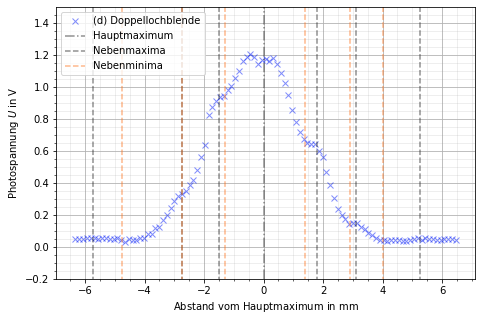

In [149]:
# (d) Doppellochblende

# Hauptmaximum
max_doppellochblende = 20000

# Nebenmaxima
smax_l3_doppellochblende = -5.75
smax_l2_doppellochblende = -2.75
smax_l1_doppellochblende = -1.5

smax_r1_doppellochblende = 1.8
smax_r2_doppellochblende = 3.1
smax_r3_doppellochblende = 5.25

# Nebenminima
smin_l3_doppellochblende = -4.75
smin_l2_doppellochblende = -2.75    # the truth hurts
smin_l1_doppellochblende = -1.3

smin_r1_doppellochblende = 1.4
smin_r2_doppellochblende = 2.9
smin_r3_doppellochblende = 4


# Datenarrays
motorposition_doppellochblende = (d_doppellochblende_dataframe[:,0] - max_doppellochblende) / 400
photospannung_doppellochblende = d_doppellochblende_dataframe[:,1]

# Plot
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_doppellochblende, photospannung_doppellochblende, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(d) Doppellochblende')

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum') # Hauptmaximum
plt.vlines(x = [smax_l3_doppellochblende, smax_l2_doppellochblende, smax_l1_doppellochblende, smax_r1_doppellochblende, smax_r2_doppellochblende, smax_r3_doppellochblende], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_doppellochblende, smin_l2_doppellochblende, smin_l1_doppellochblende, smin_r1_doppellochblende, smin_r2_doppellochblende, smin_r3_doppellochblende], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc="upper left")

plt.ylim([-0.2, 1.5])

plt.savefig('./V24_BI_d_Doppellochblende.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

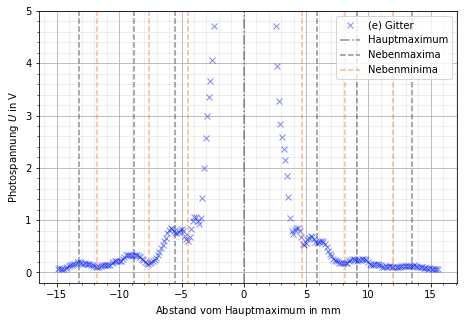

In [150]:
# (e) Gitter

# Hauptmaximum
max_gitter = 19350 

# Nebenmaxima
smax_l3_gitter = -13.2
smax_l2_gitter = -8.8
smax_l1_gitter = -5.5

smax_r1_gitter = 5.9
smax_r2_gitter = 9.1
smax_r3_gitter = 13.5

# Nebenminima
smin_l3_gitter = -11.8
smin_l2_gitter = -7.6
smin_l1_gitter = -4.5

smin_r1_gitter = 4.7
smin_r2_gitter = 8.1
smin_r3_gitter = 12


# Datenarrays
motorposition_gitter = (e_gitter_dataframe[:,0] - max_gitter) / 400
photospannung_gitter = e_gitter_dataframe[:,1]

# Plot
fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'Abstand vom Hauptmaximum in $\mathrm{mm}$')
ax.set_ylabel(r'Photospannung $U$ in $\mathrm{V}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()
ax.plot(motorposition_gitter, photospannung_gitter, color = 'xkcd:rich blue', marker = "x",  linestyle = "", alpha = 0.5, linewidth = 1, label = '(e) Gitter')  

plt.axvline(x = 0, color = '#212121', linestyle = "-.", alpha = 0.5, linewidth = 1.5, label = 'Hauptmaximum')   # Hauptmaximum
plt.vlines(x = [smax_l3_gitter, smax_l2_gitter, smax_l1_gitter, smax_r1_gitter, smax_r2_gitter, smax_r3_gitter], ymin = -2, ymax = 10, colors = '#212121', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenmaxima')     # Nebenmaxima
plt.vlines(x = [smin_l3_gitter, smin_l2_gitter, smin_l1_gitter, smin_r1_gitter, smin_r2_gitter, smin_r3_gitter], ymin = -2, ymax = 10, colors = '#FE7018', ls = '--', alpha = 0.5, lw = 1.5, label = 'Nebenminima')     # Nebenminima

ax.legend()
ax.legend(loc = "upper right")

plt.ylim([-0.2, 5])

plt.savefig('./V24_BI_e_Gitter.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

In [151]:
# Datenweiterverarbeitung: sin(alpha)

# Abstand
distance = 1100
distance_error = 10


# globale Ableseungenauigkeit
minmax_error = 0.5

x_xmax, l = sy.symbols('x_xmax, l')


# Returniert sin(alpha), Fehler für gegebene Abstände zum Hauptmaximum
def f_sin_alpha(x):
    sin_apha, sin_alpha_error = err_gauss(
        sy.sin(sy.atan(x_xmax/l)),
        x_xmax, x, minmax_error,
        l, distance, distance_error,
    )
    return sin_apha, sin_alpha_error


# Arrays mit Extrema: Reihenfolge wie in LaTeX (smax_l3_spalt, smin_l3_spalt, smax_l2_spalt, smin_l2_spalt, smax_l1_spalt, smin_l1_spalt, 0, smin_r1_spalt, smax_r1_spalt, smin_r2_spalt, smax_r2_spalt, smin_r3_spalt, smax_r3_spalt)
a_spalt_ext_array = np.array([smax_l3_spalt, smin_l3_spalt, smax_l2_spalt, smin_l2_spalt, smax_l1_spalt, smin_l1_spalt, 0, smin_r1_spalt, smax_r1_spalt, smin_r2_spalt, smax_r2_spalt, smin_r3_spalt, smax_r3_spalt])
b_steg_ext_array = np.array([smax_l3_steg, smin_l3_steg, smax_l2_steg, smin_l2_steg, smax_l1_steg, smin_l1_steg, 0, smin_r1_steg, smax_r1_steg, smin_r2_steg, smax_r2_steg, smin_r3_steg, smax_r3_steg])
c_kreisblende_ext_array = np.array([smax_l3_kreisblende, smin_l3_kreisblende, smax_l2_kreisblende, smin_l2_kreisblende, smax_l1_kreisblende, smin_l1_kreisblende, 0, smin_r1_kreisblende, smax_r1_kreisblende, smin_r2_kreisblende, smax_r2_kreisblende, smin_r3_kreisblende, smax_r3_kreisblende])
d_doppellochblende_ext_array = np.array([smax_l3_doppellochblende, smin_l3_doppellochblende, smax_l2_doppellochblende, smin_l2_doppellochblende, smax_l1_doppellochblende, smin_l1_doppellochblende, 0, smin_r1_doppellochblende, smax_r1_doppellochblende, smin_r2_doppellochblende, smax_r2_doppellochblende, smin_r3_doppellochblende, smax_r3_doppellochblende])
e_gitter_ext_array = np.array([smax_l3_gitter, smin_l3_gitter, smax_l2_gitter, smin_l2_gitter, smax_l1_gitter, smin_l1_gitter, 0, smin_r1_gitter, smax_r1_gitter, smin_r2_gitter, smax_r2_gitter, smin_r3_gitter, smax_r3_gitter])


# Berechnung sin(alpha) für sämtliche Extrema
a_spalt_sin_alpha_array = [f_sin_alpha(x) for x in a_spalt_ext_array]
b_steg_sin_alpha_array = [f_sin_alpha(x) for x in b_steg_ext_array]
c_kreisblende_sin_alpha_array = [f_sin_alpha(x) for x in c_kreisblende_ext_array]
d_doppellochblende_sin_alpha_array = [f_sin_alpha(x) for x in d_doppellochblende_ext_array]
e_gitter_sin_alpha_array = [f_sin_alpha(x) for x in e_gitter_ext_array]

In [152]:
# Datenweiterverarbeitung: epsilon / pi = (2i-1)/2 [Nebenmaximum], epsilon / pi = i [Nebenminimum]
a_spalt_eps_pi_array = np.array([-3.4709, -3, -2.459, -2, -1.4303, -1, 0, 1, 1.4303, 2, 2.459, 3, 3.4709])   # epsilon / pi = (2i-1)/2 [Nebenmaximum], epsilon / pi = i [Nebenminimum]
b_steg_eps_pi_array = np.array([-3.4709, -3, -2.459, -2, -1.4303, -1, 0, 1, 1.4303, 2, 2.459, 3, 3.4709])    # epsilon / pi = (2i-1)/2 [Nebenmaximum], epsilon / pi = i [Nebenminimum]
c_kreisblende_eps_pi_array = np.array([-3.6987, -3.2383, -2.6793, -2.2331, -1.6347, -1.2197, 0, 1.2197, 1.6347, 2.2331, 2.6793, 3.2383, 3.6987])
d_doppellochblende_eps_pi_array = np.array([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
e_gitter_eps_pi_array = np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6])


In [153]:
# Datenausgabe

# Liste der Extrema in Reihenfolge der Arrays / LaTeX-Tabellen
ext_list = [
    '3. Maximum links', 
    '3. Minimum links', 
    '2. Maximum links', 
    '2. Minimum links', 
    '1. Maximum links', 
    '1. Minimum links', 
    'Hauptmaximum', 
    '1. Minimum rechts', 
    '1. Maximum rechts',
    '2. Minimum rechts', 
    '2. Maximum rechts', 
    '3. Minimum rechts', 
    '3. Maximum rechts', 
    ]


# Funktion zur Ausgabe der Tabelle als LaTeX-Code (man muss nur noch die Rundungen manuell anpassen, zu kompliziert zu automatisieren)
def print_table(ext_array, sin_alpha_array, eps_pi_array):
    for i in range(13):
        print(f"\t\t {ext_list[i]} & (${ext_array[i]}\,\pm\,{minmax_error}$) & (${sin_alpha_array[i][0]}\,\pm\,{sin_alpha_array[i][1]}$) & {eps_pi_array[i]} \\\\")


# Ausprinten der LaTeX-Tabellen
print_table(a_spalt_ext_array, a_spalt_sin_alpha_array, a_spalt_eps_pi_array)
# print_table(b_steg_ext_array, b_steg_sin_alpha_array, b_steg_eps_pi_array)
# print_table(c_kreisblende_ext_array, c_kreisblende_sin_alpha_array, c_kreisblende_eps_pi_array)
# print_table(d_doppellochblende_ext_array, d_doppellochblende_sin_alpha_array, d_doppellochblende_eps_pi_array)
# print_table(e_gitter_ext_array, e_gitter_sin_alpha_array, e_gitter_eps_pi_array)

		 3. Maximum links & ($-11.5\,\pm\,0.5$) & ($-0.0104539741734258\,\pm\,0.000464299182043632$) & -3.4709 \\
		 3. Minimum links & ($-10.1\,\pm\,0.5$) & ($-0.00918143116609342\,\pm\,0.000462087634306982$) & -3.0 \\
		 2. Maximum links & ($-8.5\,\pm\,0.5$) & ($-0.00772704203700264\,\pm\,0.000459900480777717$) & -2.459 \\
		 2. Minimum links & ($-7.25\,\pm\,0.5$) & ($-0.00659076594075511\,\pm\,0.000458447672662942$) & -2.0 \\
		 1. Maximum links & ($-5.1\,\pm\,0.5$) & ($-0.00463631380583717\,\pm\,0.000456480722894945$) & -1.4303 \\
		 1. Minimum links & ($-4.0\,\pm\,0.5$) & ($-0.00363633959452844\,\pm\,0.000455736933418124$) & -1.0 \\
		 Hauptmaximum & ($0.0\,\pm\,0.5$) & ($0\,\pm\,0.000454545454545455$) & 0.0 \\
		 1. Minimum rechts & ($3.55\,\pm\,0.5$) & ($0.00322725592091453\,\pm\,0.000455484198888233$) & 1.0 \\
		 1. Maximum rechts & ($4.9\,\pm\,0.5$) & ($0.00445450125948567\,\pm\,0.000456332213479436$) & 1.4303 \\
		 2. Minimum rechts & ($6.75\,\pm\,0.5$) & ($0.00613624810736673\,\pm

In [154]:
# Curve-Fit
def lin_reg(x, m, a):
    return m * x + a


# Optimierung (a) Spalt
a_spalt_x = np.linspace(-4, 4, 100)
a_spalt_y = np.array([a_spalt_sin_alpha_array[i][0] for i in range(len(a_spalt_sin_alpha_array))], dtype=float)
a_spalt_y_err = np.array([a_spalt_sin_alpha_array[i][1] for i in range(len(a_spalt_sin_alpha_array))], dtype=float)

popt_a_spalt, pcov_a_spalt = curve_fit(lin_reg, a_spalt_eps_pi_array, a_spalt_y)
print(f"Fitparameter (a) Spalt: m = {popt_a_spalt[0]}, a = {popt_a_spalt[1]}")


# Optimierung (b) Steg
b_steg_x = np.linspace(-4, 4, 100)
b_steg_y = np.array([b_steg_sin_alpha_array[i][0] for i in range(len(b_steg_sin_alpha_array))], dtype=float)
b_steg_y_err = np.array([b_steg_sin_alpha_array[i][1] for i in range(len(b_steg_sin_alpha_array))], dtype=float)

popt_b_steg, pcov_b_steg = curve_fit(lin_reg, b_steg_eps_pi_array, b_steg_y)
print(f"Fitparameter (b) Steg: m = {popt_b_steg[0]}, a = {popt_b_steg[1]}")


# Optimierung (c) Kreisblende
c_kreisblende_x = np.linspace(-4.5, 4.5, 100)
c_kreisblende_y = np.array([c_kreisblende_sin_alpha_array[i][0] for i in range(len(c_kreisblende_sin_alpha_array))], dtype=float)
c_kreisblende_y_err = np.array([c_kreisblende_sin_alpha_array[i][1] for i in range(len(c_kreisblende_sin_alpha_array))], dtype=float)

popt_c_kreisblende, pcov_c_kreisblende = curve_fit(lin_reg, c_kreisblende_eps_pi_array, c_kreisblende_y)
print(f"Fitparameter (c) Kreisblende: m = {popt_c_kreisblende[0]}, a = {popt_c_kreisblende[1]}")


# Optimierung (d) Doppellochblende
d_doppellochblende_x = np.linspace(-4, 4, 100)
d_doppellochblende_y = np.array([d_doppellochblende_sin_alpha_array[i][0] for i in range(len(d_doppellochblende_sin_alpha_array))], dtype=float)
d_doppellochblende_y_err = np.array([d_doppellochblende_sin_alpha_array[i][1] for i in range(len(d_doppellochblende_sin_alpha_array))], dtype=float)

popt_d_doppellochblende, pcov_d_doppellochblende = curve_fit(lin_reg, d_doppellochblende_eps_pi_array, d_doppellochblende_y)
print(f"Fitparameter (d) Doppellochblende: m = {popt_d_doppellochblende[0]}, a = {popt_d_doppellochblende[1]}")


# Optimierung (d) Gitter
e_gitter_x = np.linspace(-6.5, 6.5, 100)
e_gitter_y = np.array([e_gitter_sin_alpha_array[i][0] for i in range(len(e_gitter_sin_alpha_array))], dtype=float)
e_gitter_y_err = np.array([e_gitter_sin_alpha_array[i][1] for i in range(len(e_gitter_sin_alpha_array))], dtype=float)

popt_e_gitter, pcov_e_gitter = curve_fit(lin_reg, e_gitter_eps_pi_array, e_gitter_y)
print(f"Fitparameter (e) Gitter: m = {popt_e_gitter[0]}, a = {popt_e_gitter[1]}")

Fitparameter (a) Spalt: m = 0.0031306024337228113, a = -1.748969142208547e-05
Fitparameter (b) Steg: m = 0.0030419321663949232, a = -6.992452955041338e-06
Fitparameter (c) Kreisblende: m = 0.0025180384504852518, a = -8.740695748477584e-05
Fitparameter (d) Doppellochblende: m = 0.0015923942731838059, a = -2.4473417608916748e-05
Fitparameter (e) Gitter: m = 0.0021472391181160955, a = 0.00013285379237581996


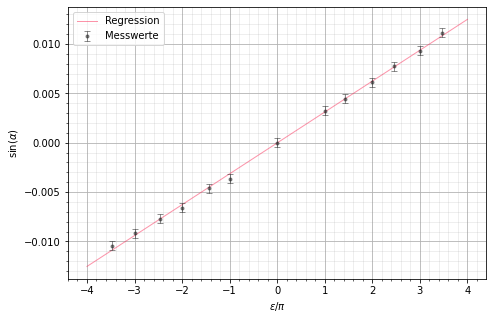

In [155]:
# (a) Spalt

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'$\epsilon/\pi$')
ax.set_ylabel(r'sin($\alpha$)')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on() 

ax.plot(a_spalt_x, lin_reg(a_spalt_x, *popt_a_spalt), color = 'xkcd:red pink', alpha = 0.5, linewidth = 1, label = 'Regression')
ax.errorbar(a_spalt_eps_pi_array, a_spalt_y, yerr = a_spalt_y_err, fmt = '.', color = '#212121', alpha = 0.5, linewidth = 1, ecolor = '#212121', capsize = 3, label = 'Messwerte')

ax.legend()
ax.legend(loc = "upper left")

plt.savefig('./V24_a_Spalt.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

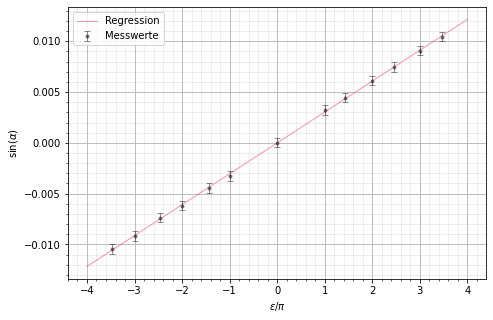

In [156]:
# (b) Steg

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'$\epsilon/\pi$')
ax.set_ylabel(r'sin($\alpha$)')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on() 

ax.plot(b_steg_x, lin_reg(b_steg_x, *popt_b_steg), color = 'xkcd:red pink', alpha = 0.5, linewidth = 1, label = 'Regression')
ax.errorbar(b_steg_eps_pi_array, b_steg_y, yerr = b_steg_y_err, fmt = '.', color = '#212121', alpha = 0.5, linewidth = 1, ecolor = '#212121', capsize = 3, label = 'Messwerte')

ax.legend()
ax.legend(loc = "upper left")

plt.savefig('./V24_b_Steg.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

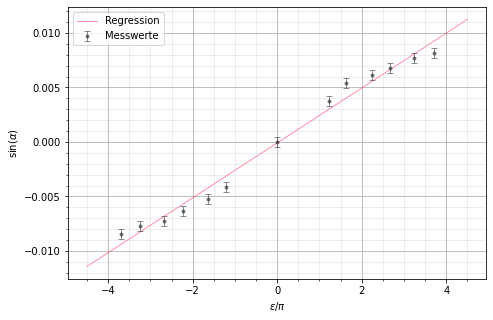

In [157]:
# (c) Kreisblende

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'$\epsilon/\pi$')
ax.set_ylabel(r'sin($\alpha$)')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on() 

ax.plot(c_kreisblende_x, lin_reg(c_kreisblende_x, *popt_c_kreisblende), color = 'xkcd:red pink', alpha = 0.5, linewidth = 1, label = 'Regression')
ax.errorbar(c_kreisblende_eps_pi_array, c_kreisblende_y, yerr = c_kreisblende_y_err, fmt = '.', color = '#212121', alpha = 0.5, linewidth = 1, ecolor = '#212121', capsize = 3, label = 'Messwerte')

ax.legend()
ax.legend(loc = "upper left")

plt.savefig('./V24_c_kreisblende.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

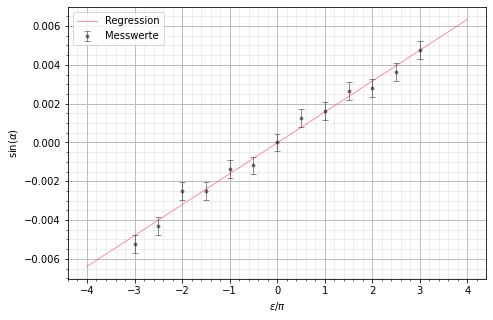

In [158]:
# (d) Doppellochblende

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'$\epsilon/\pi$')
ax.set_ylabel(r'sin($\alpha$)')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on() 

ax.plot(d_doppellochblende_x, lin_reg(d_doppellochblende_x, *popt_d_doppellochblende), color = 'xkcd:red pink', alpha = 0.5, linewidth = 1, label = 'Regression')
ax.errorbar(d_doppellochblende_eps_pi_array, d_doppellochblende_y, yerr = d_doppellochblende_y_err, fmt = '.', color = '#212121', alpha = 0.5, linewidth = 1, ecolor = '#212121', capsize = 3, label = 'Messwerte')

ax.legend()
ax.legend(loc = "upper left")

plt.savefig('./V24_d_doppellochblende.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

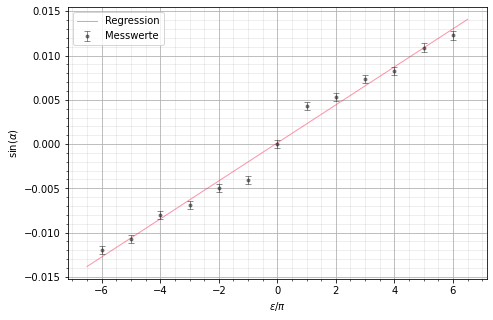

In [159]:
# (e) Gitter

fig, ax = plt.subplots(figsize=(7.5,5))
ax.set_xlabel(r'$\epsilon/\pi$')
ax.set_ylabel(r'sin($\alpha$)')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on() 

ax.plot(e_gitter_x, lin_reg(e_gitter_x, *popt_e_gitter), color = 'xkcd:red pink', alpha = 0.5, linewidth = 1, label = 'Regression')
ax.errorbar(e_gitter_eps_pi_array, e_gitter_y, yerr = e_gitter_y_err, fmt = '.', color = '#212121', alpha = 0.5, linewidth = 1, ecolor = '#212121', capsize = 3, label = 'Messwerte')

ax.legend()
ax.legend(loc = "upper left")

plt.savefig('./V24_e_gitter.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()